<font color = green >

## Home Task

</font>

Apply PCA to breast cancer dataset and visualize 2 principle components.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [2]:
# load dataset
X, y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

#### First method

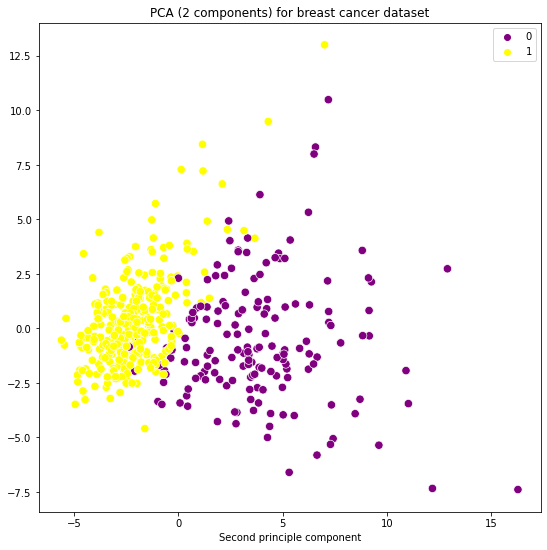

In [6]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_train_scaled)

plt.figure(figsize=(9, 9))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=y_train, s=70, palette=["purple", "yellow"])

plt.title("PCA (2 components) for breast cancer dataset")
plt.xlabel("First principle component")
plt.xlabel("Second principle component");

#### Second method

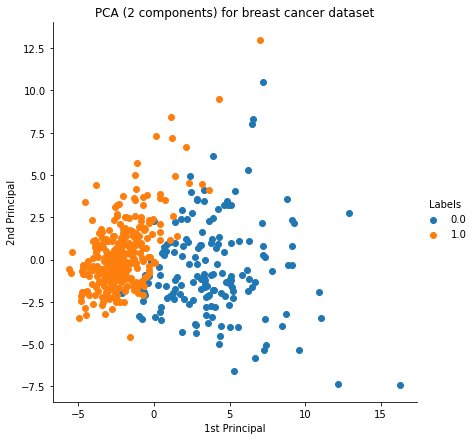

In [7]:
# appending labels to the 2D projected data
# using just 2 principal components for the ease of visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_train_scaled)
pca_data = np.vstack((pca_data.T, y_train)).T

# creating a new dataframe for plotting the labeled points
df = pd.DataFrame(data=pca_data, columns=('1st Principal', '2nd Principal', 'Labels'))

# visualizing the 2D points
sns.FacetGrid(df, hue='Labels', height=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.title("PCA (2 components) for breast cancer dataset")
plt.show()

<font color = green >

## Learn more
</font>

[numpy.cov](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)

[Eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)

[numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)